## Back Test Results Binary Classification

In [1]:
import pandas as pd
from datetime import datetime, timezone
from pycaret.datasets import get_data
from pycaret.classification import *
import yaml
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    pair = cfg['currency']['pair']
    frac = cfg['model']['frac']
    random_state = cfg['model']['random_state']

In [3]:
print('Pair:', pair)
print('Fraction:', frac)
print('Random State:', random_state)

Pair: USDCAD
Fraction: 0.7
Random State: 400


In [4]:
now = datetime.now()
today = now.strftime("%d-%m-%Y_%I-%M_%p")

In [5]:
dataset = pd.read_csv('01_Back_Test_Data.csv')
dataset.shape

(4000, 11)

In [6]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Score,Rec1_Prediction,Rec2_Score,Rec2_Prediction,Rec3_Score,Rec3_Prediction,Rec4_Score,Rec4_Prediction
0,7322.0,30.0,Bullish,58.651384,BUY,22.543478,BUY,76.144167,SELL,12.142555,BUY
1,987.0,19.0,Bullish,55.600891,SELL,8.149715,BUY,64.691336,SELL,14.492037,SELL
2,8102.0,81.0,Bearish,93.679851,SELL,66.710224,SELL,76.848438,BUY,80.294636,SELL
3,8279.0,45.0,Bearish,1.361898,SELL,20.769899,SELL,47.482199,BUY,49.937089,BUY
4,9380.0,23.0,Bullish,4.702912,SELL,53.448606,SELL,0.491457,BUY,0.510921,BUY


## Drop Predictions with Less than 20% LR Fit

In [7]:
dataset = dataset[dataset['Current_Market_Fit'] > 20]
dataset = dataset.reset_index()
del dataset['index']

In [8]:
dataset.shape

(2859, 11)

## One-Hot Encoding

In [9]:
dataset['Current_Market'] = dataset['Current_Market'].replace(['Bullish','Bearish'],[1,0])
dataset['Rec1_Prediction'] = dataset['Rec1_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec2_Prediction'] = dataset['Rec2_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec3_Prediction'] = dataset['Rec3_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec4_Prediction'] = dataset['Rec4_Prediction'].replace(['BUY','SELL'],[1,-1])

In [10]:
dataset['Rec1_Score'] = dataset['Rec1_Score'] * dataset['Rec1_Prediction']
dataset['Rec2_Score'] = dataset['Rec2_Score'] * dataset['Rec2_Prediction']
dataset['Rec3_Score'] = dataset['Rec3_Score'] * dataset['Rec3_Prediction']
dataset['Rec4_Score'] = dataset['Rec4_Score'] * dataset['Rec4_Prediction']

In [11]:
dataset['Rec1_Score'] = dataset['Rec1_Score'].round(2)
dataset['Rec2_Score'] = dataset['Rec2_Score'].round(2)
dataset['Rec3_Score'] = dataset['Rec3_Score'].round(2)
dataset['Rec4_Score'] = dataset['Rec4_Score'].round(2)

In [12]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
    'Rec1_Prediction',
    'Rec2_Prediction',
    'Rec3_Prediction',
    'Rec4_Prediction',
], axis=1)

In [13]:
dataset.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score
0,1,58.65,22.54,-76.14,12.14
1,0,-93.68,-66.71,76.85,-80.29
2,0,-1.36,-20.77,47.48,49.94
3,1,-4.70,-53.45,0.49,0.51
4,0,-66.61,-72.72,-29.36,-66.91


In [14]:
data = dataset.sample(frac=frac, random_state=random_state).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
print('Fraction: ' + str(frac))
#print('Random State: ', str(random_state))

Data for Modeling: (2001, 5)
Unseen Data For Predictions: (858, 5)
Fraction: 0.7


# Create Unseen DataFrame

In [15]:
data_unseen.shape

(858, 5)

In [16]:
data_unseen.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score
0,1,-26.74,-68.69,85.18,0.03
1,0,11.30,-82.66,66.66,64.52
2,0,18.71,-49.69,-22.03,6.95
3,1,49.60,17.27,49.98,77.24
4,1,-25.73,25.80,22.42,23.70


In [17]:
exp_name = setup(data = data,
                 target = 'Current_Market',
#                 fold_shuffle=True,
                 session_id=123,
                 silent=True,
#                 n_jobs = 64,
#                 imputation_type='iterative'
                ) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2001, 5)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5286,0.5321,0.5432,0.5384,0.5397,0.0565,0.0567,0.1700
et,Extra Trees Classifier,0.5179,0.5257,0.5236,0.5272,0.5246,0.0351,0.0353,0.0790
rf,Random Forest Classifier,0.5171,0.5206,0.5292,0.5273,0.5273,0.0334,0.0334,0.2300
lr,Logistic Regression,0.5164,0.5216,0.6302,0.5203,0.5697,0.0283,0.0298,0.2360
ridge,Ridge Classifier,0.5164,0.0000,0.6302,0.5203,0.5697,0.0283,0.0298,0.1420
lda,Linear Discriminant Analysis,0.5164,0.5217,0.6302,0.5203,0.5697,0.0283,0.0298,0.0060
ada,Ada Boost Classifier,0.5150,0.5249,0.5573,0.5249,0.5389,0.0280,0.0280,0.0180
nb,Naive Bayes,0.5107,0.5174,0.6147,0.5159,0.5606,0.0172,0.0182,0.1470
qda,Quadratic Discriminant Analysis,0.5086,0.5032,0.6006,0.5154,0.5542,0.0129,0.0131,0.0040
dt,Decision Tree Classifier,0.5036,0.5035,0.5085,0.5144,0.5104,0.0069,0.0069,0.1540


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [20]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    model = cfg['model']['name']

In [21]:
print('Model Name:', model)

Model Name: knn


In [22]:
MODEL = create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5643,0.5438,0.6250,0.5696,0.5960,0.1254,0.1260
1,0.5714,0.5952,0.5556,0.5882,0.5714,0.1436,0.1438
2,0.5286,0.5255,0.5833,0.5385,0.5600,0.0541,0.0543
3,0.5643,0.5998,0.5417,0.5821,0.5612,0.1296,0.1300
4,0.5286,0.5044,0.5070,0.5373,0.5217,0.0577,0.0578
5,0.4357,0.4437,0.4789,0.4474,0.4626,-0.1300,-0.1303
6,0.5214,0.4974,0.4507,0.5333,0.4885,0.0448,0.0454
7,0.5357,0.5455,0.5352,0.5429,0.5390,0.0714,0.0714
8,0.4929,0.4961,0.5493,0.5000,0.5235,-0.0159,-0.0160
9,0.5429,0.5700,0.6056,0.5443,0.5733,0.0840,0.0846


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


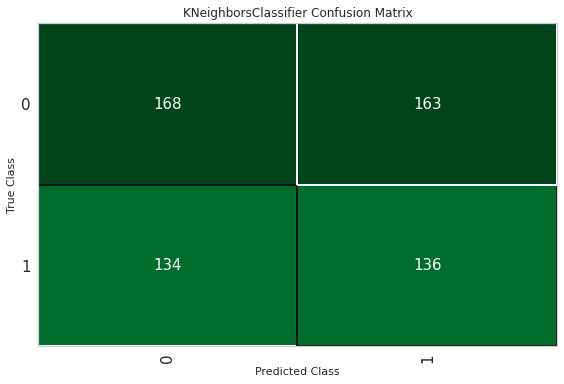

In [23]:
plot_model(MODEL, plot = 'confusion_matrix')

In [24]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5500,0.5615,0.5833,0.5600,0.5714,0.0982,0.0983
1,0.5714,0.5854,0.5833,0.5833,0.5833,0.1422,0.1422
2,0.5571,0.5603,0.6389,0.5610,0.5974,0.1099,0.1111
3,0.5571,0.5870,0.5833,0.5676,0.5753,0.1128,0.1129
4,0.5143,0.5464,0.5211,0.5211,0.5211,0.0284,0.0284
5,0.5143,0.4630,0.4930,0.5224,0.5072,0.0292,0.0292
6,0.5357,0.5368,0.4507,0.5517,0.4961,0.0737,0.0750
7,0.5357,0.5650,0.5493,0.5417,0.5455,0.0710,0.0711
8,0.5286,0.5321,0.5915,0.5316,0.5600,0.0554,0.0558
9,0.5643,0.5840,0.6056,0.5658,0.5850,0.1275,0.1278


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


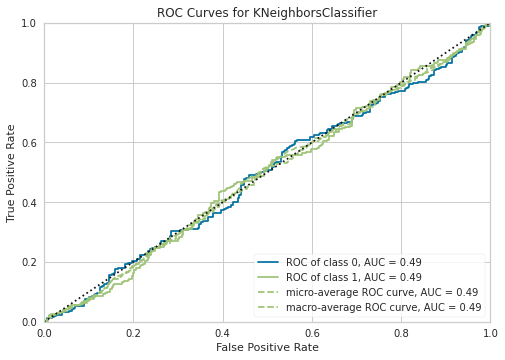

In [25]:
plot_model(TUNED_MODEL, plot = 'auc')

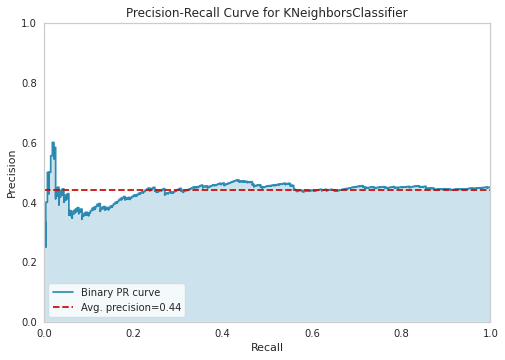

In [26]:
plot_model(TUNED_MODEL, plot = 'pr')

In [27]:
plot_model(TUNED_MODEL, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

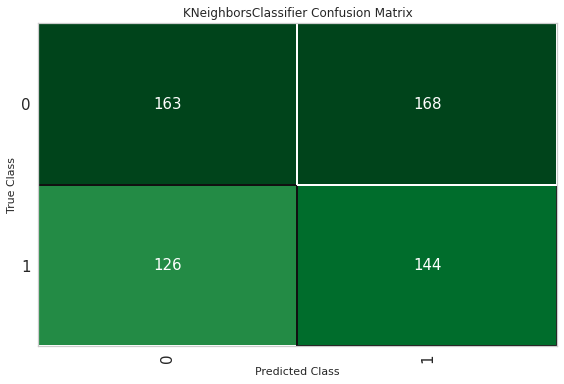

In [33]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [34]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5108,0.4919,0.5333,0.4615,0.4948,0.0254,0.0257


In [35]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

In [36]:
print(FINAL_MODEL)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')


In [37]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [38]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score,Label,Score
0,1,-26.74,-68.69,85.18,0.03,1,1.0000
1,0,11.30,-82.66,66.66,64.52,0,1.0000
2,0,18.71,-49.69,-22.03,6.95,0,1.0000
3,1,49.60,17.27,49.98,77.24,1,1.0000
4,1,-25.73,25.80,22.42,23.70,1,0.6197


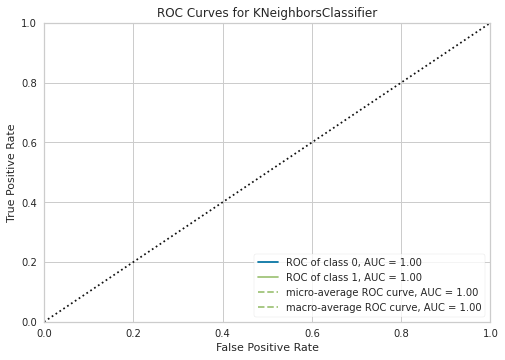

In [39]:
plot_model(FINAL_MODEL, plot = 'auc')

In [40]:
pkl_name = (today + "_" + model + "_" + pair)

In [41]:
save_model(FINAL_MODEL, pkl_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                 ('fix_perfect', Remove_100(target='Current_Market')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'p

In [42]:
SAVED_FINAL_MODEL = load_model(pkl_name)

Transformation Pipeline and Model Successfully Loaded


In [43]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [44]:
data_unseen.shape

(858, 5)

In [45]:
new_prediction.head(20)

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score,Label,Score
0,1,-26.74,-68.69,85.18,0.03,1,1.0000
1,0,11.30,-82.66,66.66,64.52,0,1.0000
2,0,18.71,-49.69,-22.03,6.95,0,1.0000
3,1,49.60,17.27,49.98,77.24,1,1.0000
4,1,-25.73,25.80,22.42,23.70,1,0.6197
5,1,26.52,-71.01,27.19,5.54,1,1.0000
6,0,-47.03,-44.35,-52.19,-58.22,0,1.0000
7,1,53.55,85.78,43.29,3.77,1,1.0000
8,1,-40.94,77.65,-19.75,-68.16,0,0.8665
9,0,5.95,80.03,-37.77,85.62,0,1.0000


In [46]:
file = open(today + "_" + model + "_binary_classification_log_" + pair + ".txt", "w")
file.write ("Date: " + today + "\n" + \
            "Currency Pair: " + pair + "\n" + \
            "Model: " + model + "\n" + \
            "Frac: " + str(frac) + "\n" + \
            "Random State: " + str(random_state) + "\n" )
file.close()

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forex

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
